In [11]:
from sklearn import datasets

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive/MyDrive/Colab Notebooks/Machine Learning


In [14]:
cd MyDrive

[Errno 2] No such file or directory: 'MyDrive'
/content/drive/MyDrive/Colab Notebooks/Machine Learning


In [15]:
cd Colab Notebooks

[Errno 2] No such file or directory: 'Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks/Machine Learning


In [16]:
cd Machine Learning

[Errno 2] No such file or directory: 'Machine Learning'
/content/drive/MyDrive/Colab Notebooks/Machine Learning


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#from sklearn.datasets import california_housing
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm

In [18]:
ls

 Bayesian/  'Decision Trees'/   Intro/  'Linear Regression'/


In [19]:
housing_data = pd.read_csv("Linear Regression/housing.csv")
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [20]:
df=housing_data

In [21]:
df.rename(columns = {'median_house_value':'Target'}, inplace = True)

In [22]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [23]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Target
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
Target,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [24]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [25]:
def Norm(x):
  minx=x.min()
  maxx=x.max()
  return pd.Series([(i-minx)/(maxx-minx) for i in x])

x=Norm(df.median_income)
y=Norm(df.Target)
print("Maximum Value of Median Income= {}".format(x.max()))
print("Maximum Value of Target= {}".format(y.max()))


Maximum Value of Median Income= 1.0
Maximum Value of Target= 1.0


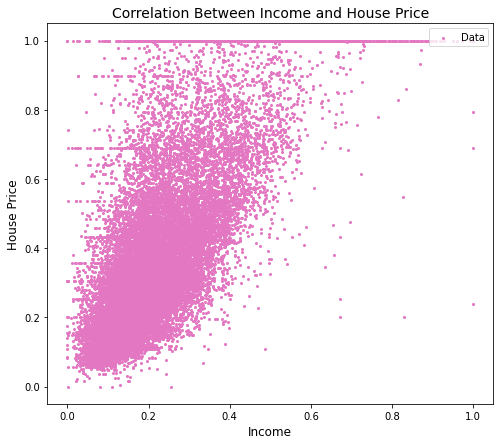

In [26]:
plt.figure(figsize=(8,7))
plt.scatter(x,y,label='Data',c='#e377c2',s=4)
plt.title('Correlation Between Income and House Price',fontSize=14)
plt.xlabel('Income',fontSize=12)
plt.ylabel('House Price',fontSize=12)
plt.legend(loc=1,fontsize=10)
plt.show()

In [27]:
#X=np.array(x.reshape((-1,1))
#Y=np.array(y)

print (x.ndim)
print(x.shape)

1
(20640,)


In [28]:
X=np.array(x).reshape((-1,1))

In [29]:
print(X.shape)

(20640, 1)


In [30]:
X

array([[0.53966842],
       [0.53802706],
       [0.46602805],
       ...,
       [0.08276438],
       [0.09429525],
       [0.13025338]])

In [31]:
y=np.array(y)

In [32]:
model=LinearRegression(normalize=False)

In [33]:
model.fit(X,y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


LinearRegression(normalize=False)

In [34]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.10511157050753583
slope: [1.24951891]


In [35]:
y_pred=model.predict(X)
print(y_pred)

[0.77943747 0.77738656 0.68742244 ... 0.20852722 0.22293527 0.26786563]


In [36]:
y_pred=model.intercept_+ model.coef_* X
print('Predicted Response:', y_pred, sep='\n')
print(type(y_pred))
print(y_pred.ndim)

Predicted Response:
[[0.77943747]
 [0.77738656]
 [0.68742244]
 ...
 [0.20852722]
 [0.22293527]
 [0.26786563]]
<class 'numpy.ndarray'>
2


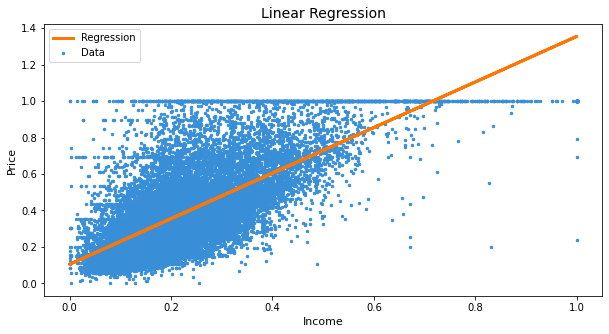

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend(frameon=True, loc=0, fontsize=10)
plt.show()

In [38]:
class LinearRegression:
        def fit(self,X,y):
          self.X=X
          self.y=y
          self.m= ((np.mean(X)*np.mean(y)-np.mean(X*y)))/(np.mean(X)**2-np.mean(X**2))
          self.b=np.mean(y)-self.m * np.mean(x)
        
        def coeffs(self):
          return self.m,self.b

        def predict(self):
          self.y_pred=self.m* self.X +self.b
          return self.y_pred 

In [39]:
def Norm(x):
  minx = x.min()
  maxx = x.max()
  return pd.Series([(i - minx)/(maxx-minx) for i in x])
X = Norm(df.median_income)
y = Norm(df.Target)
print("maximum value of MedInc = {}".format(x.max()))
print("maximum value of Target = {}".format(y.max()))

maximum value of MedInc = 1.0
maximum value of Target = 1.0


In [40]:
lr=LinearRegression()
lr.fit(X,y)
y_pred=lr.predict()
m,b=lr.coeffs()

In [41]:
print("MSE:{}".format(mean_squared_error(y, y_pred)))
print("slope:{}".format(m))
print("intercept:{}".format(b))

MSE:0.029806583815656068
slope:1.2495189137309461
intercept:0.10511157050753578


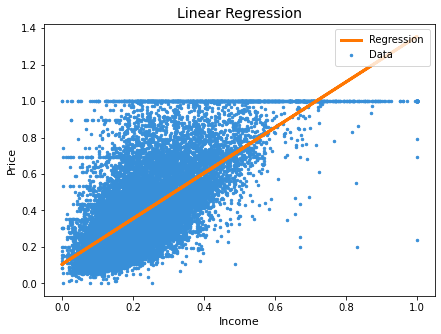

In [42]:
plt.figure(figsize=(7,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

### **Gradient Descent**

In [43]:
def gradient_descent(X,y,lr,epoch):

  m,b=0.1,0.1
  mse=[]
  N=len(X)

  for i in range(epoch):

    f=y-(m*X+b)

    m-=lr*(-2*X.dot(f).sum()/N)
    b-=lr*(-2*f.sum()/N)
    mse.append(mean_squared_error(y,(m*X+b)))

  return m,b,mse

MSE: 7122667708.7268505


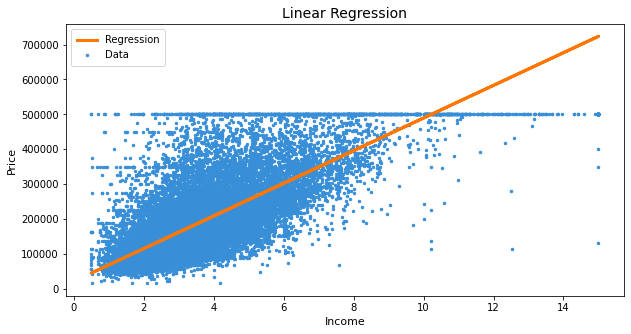

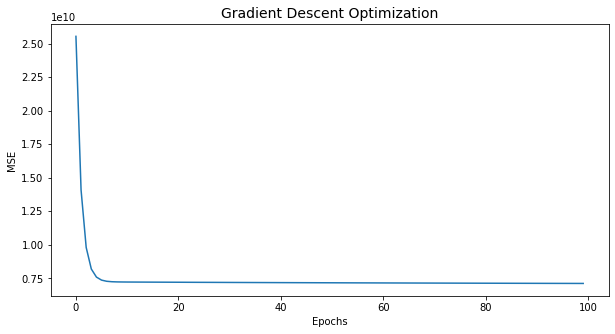

In [44]:
X = df.median_income
y = df.Target

m, b, mse = gradient_descent(X, y, lr=0.01, epoch=100)

y_pred = m*X + b

print("MSE:",mean_squared_error(y, y_pred))

plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend( loc=0, fontsize=10, borderpad=.6)
plt.show()



plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization', fontSize=14)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

### **Ridge Regression**

In [45]:
housing_data=housing_data.drop(['ocean_proximity'],axis=1)

In [46]:
df.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Target,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [47]:
X=df.drop(['Target','ocean_proximity'],axis=1)

In [48]:
#housing_data = preprocessing.scale(housing_data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [59]:
# initialize
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)

# organize dataframe
#ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate')
#ridge_df


Ridge(alpha=0)

In [61]:
ridge_reg.coef_

array([ 1.51149908e-02, -1.18998459e-04,  1.41684180e-02,  3.62276288e-03,
        5.65228403e-03, -2.03928291e-03,  1.45175270e-01])

In [62]:
k=ridge_reg.coef_[1]

In [63]:
ridge_df = pd.DataFrame({'variable': df.median_income, 'estimate':k })



In [65]:
ridge_train_pred = []
ridge_test_pred = []
# iterate lambdas
for alpha in np.arange(0, 200, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = k
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

## **Logistic Regression**

In [50]:
df1 = pd.read_csv("Linear Regression/diabetes.csv")
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = df1[feature_cols] # Features
y = df1.Outcome # Target variable

In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [53]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [54]:
cnf=metrics.confusion_matrix(y_test,y_pred)
cnf

array([[117,  13],
       [ 24,  38]])

Text(0.5, 15.0, 'Predicted label')

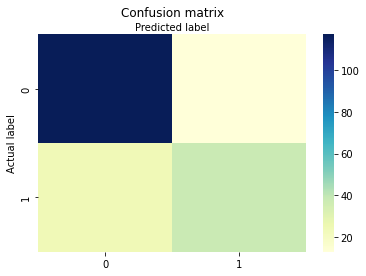

In [55]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks)
plt.yticks(tick_marks)
# create heatmap
sns.heatmap(pd.DataFrame(cnf), cmap="YlGnBu")
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


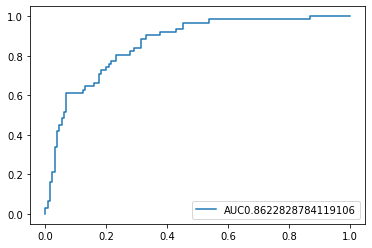

In [57]:
y_pred_proba=logreg.predict_proba(X_test)[:,1]
fpr,tpr,_=metrics.roc_curve(y_test, y_pred_proba)
auc=metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="AUC"+str(auc))
plt.legend(loc=4)
plt.show()